In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/train.csv').sample(frac=0.01, replace=False)

In [3]:
print('trip_duration all positive') if all(df.trip_duration > 0) else print("trip_duration oops")

trip_duration all positive


In [4]:
df = (df
      .assign(pickup_datetime=lambda x: pd.to_datetime(x.pickup_datetime),
              dropoff_datetime=lambda x: pd.to_datetime(x.dropoff_datetime),
              log_trip_duration=lambda x: np.log(x.trip_duration)))

(-74.03, -73.75)

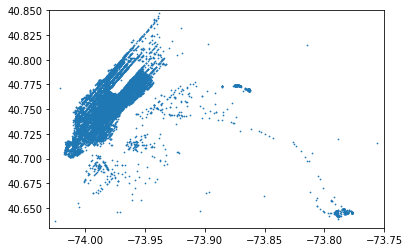

In [5]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.scatter(df.pickup_longitude, df.pickup_latitude, s = 0.5)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

# Prepare data

In [25]:
df = pd.read_csv('../data/train.csv')
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [26]:
df = (df
      .assign(pickup_datetime=lambda x: pd.to_datetime(x.pickup_datetime),
              dropoff_datetime=lambda x: pd.to_datetime(x.dropoff_datetime)))

In [27]:
ohe = OneHotEncoder()
le = LabelEncoder()
df.store_and_fwd_flag = le.fit_transform(df.store_and_fwd_flag)

In [33]:
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 
            'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag']
target = ['trip_duration']
X, y = df.loc[:, features].values, np.log(df.loc[:, target].values)

In [34]:
X.dtypes

passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int64
dtype: object

# Random forest, no feature engineering

In [35]:
rf = RandomForestRegressor(n_estimators=1000, criterion='mse', 
                           max_features='sqrt', n_jobs=-1)

In [ ]:
rf.fit(X, y)

/Users/anh/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
df_test = pd.read_csv("../data/")